In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

from sklearn.linear_model import LinearRegression

import os
working_directory = os.getcwd()
print(working_directory)

import warnings
warnings.filterwarnings('ignore')

/Users/aghorekumarjena


In [238]:
path = working_directory + '/downloads/Flight_Ticket_Participant_Datasets/Data_Train.xlsx'

In [239]:
train = pd.read_excel(path)

In [240]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [241]:
pd.set_option('display.max_columns', None)

In [242]:
train.shape

(10683, 11)

The dataframe consists of 10683 rows and 11 columns.

In [243]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Columns route and total stops contains null vlaues.

In [244]:
train.dropna(inplace=True)

In [245]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [246]:
train["Journey_day"] = pd.to_datetime(train["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [247]:
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [248]:
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

In [249]:
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

In [250]:
train["Arrival_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour

In [251]:
train["Arrival_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute

In [252]:
train.drop(["Date_of_Journey","Dep_Time","Arrival_Time"], axis = 1, inplace = True)

Separted  day,month from Date_of_Journey and hour and minute from Dep_Time and  Arrival_Time

In [253]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [254]:
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [255]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [256]:
train.drop(["Duration"], axis = 1, inplace = True)

In [257]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


splitted duration column's hours and minutes .

In [258]:
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Dropped route column as it is same as that of total stops column. Also dropped additional info column as it contain no information.

In [259]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [260]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [261]:
train.shape

(10682, 13)

In [262]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [263]:
y = train['Price']
X = train.drop(columns = ['Price'])

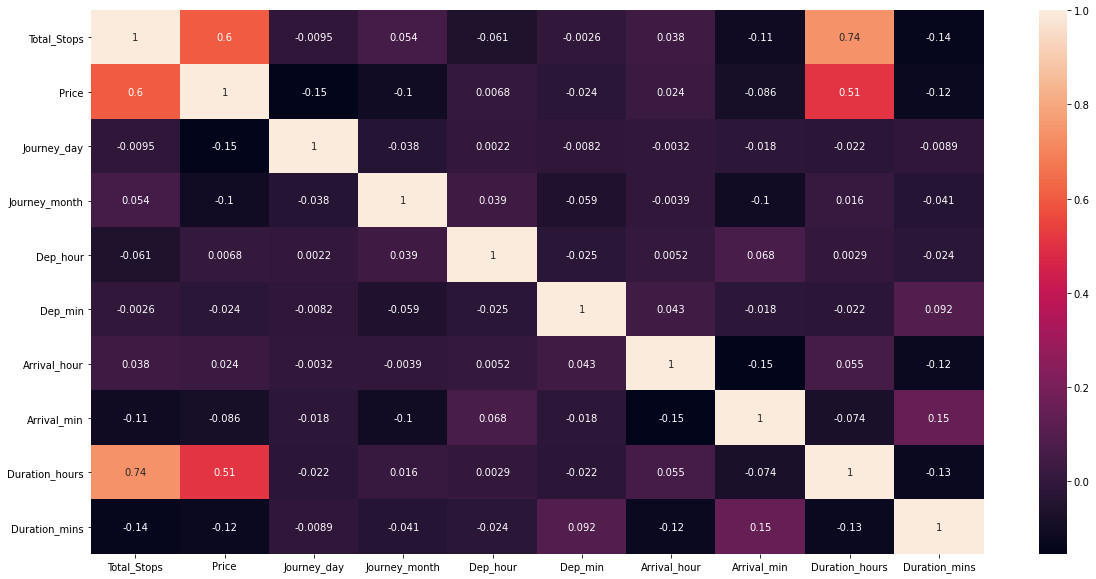

In [264]:
plt.figure(figsize= (20,10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [265]:
corr_matrix = train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price             1.000000
Total_Stops       0.603897
Duration_hours    0.508778
Arrival_hour      0.024244
Dep_hour          0.006799
Dep_min          -0.024458
Arrival_min      -0.086155
Journey_month    -0.103643
Duration_mins    -0.124855
Journey_day      -0.153774
Name: Price, dtype: float64

In [266]:
train.skew()

Total_Stops       0.317109
Price             1.812405
Journey_day       0.118174
Journey_month    -0.387409
Dep_hour          0.112924
Dep_min           0.167234
Arrival_hour     -0.370146
Arrival_min       0.110945
Duration_hours    0.851197
Duration_mins    -0.090680
dtype: float64

Doesn't have skewness.

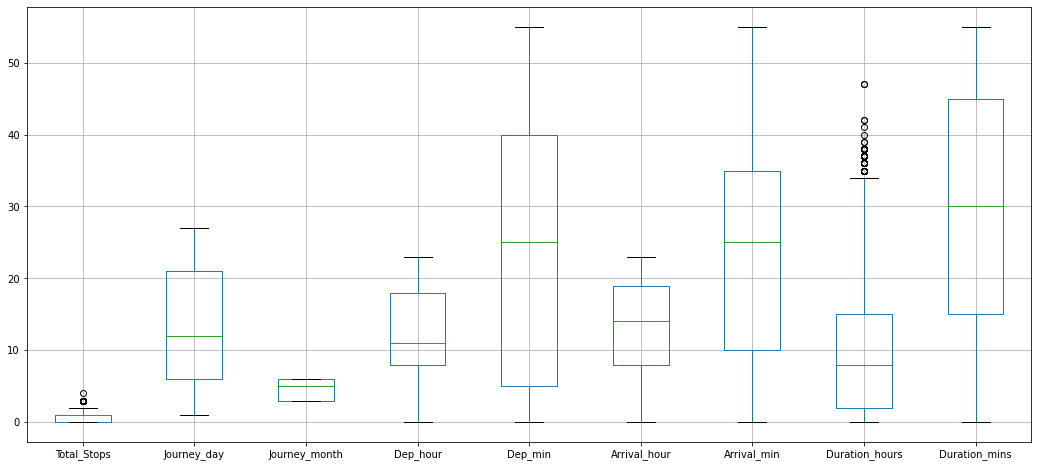

In [267]:
X.boxplot(figsize=[18,8])
plt.subplots_adjust()
plt.show()

In [268]:
train['Duration_hours'] = np.log(1 + train['Duration_hours'])

Duration_hours contained outliers so used log transformation techn.

In [269]:
pd.get_dummies(train["Airline"])
dummies = pd.get_dummies(train["Airline"])
train = pd.concat([train, dummies], axis=1)
train = train.drop("Airline", axis=1)

In [270]:
pd.get_dummies(train["Source"])
dummies = pd.get_dummies(train["Source"])
train = pd.concat([train, dummies], axis=1)
train = train.drop("Source", axis=1)

In [271]:
pd.get_dummies(train["Destination"])
dummies = pd.get_dummies(train["Destination"])
train = pd.concat([train, dummies], axis=1)
train = train.drop("Destination", axis=1)

In [272]:
train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,1.098612,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,2.079442,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,2.995732,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,1.791759,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,1.609438,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [313]:
train.shape

(10682, 33)

In [314]:
train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [316]:
X = train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Banglore,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Banglore,Banglore,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi
0,0,24,3,22,20,1,10,1.098612,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,2.079442,25,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,2.995732,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,12,5,18,5,23,30,1.791759,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,1.609438,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [318]:
y = train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [275]:
#Test Data

In [276]:
path = working_directory + '/downloads/Flight_Ticket_Participant_Datasets/Test_set.xlsx'

In [277]:
test = pd.read_excel(path)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [278]:
test.shape

(2671, 10)

In [279]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [280]:
test.dropna(inplace=True)

In [281]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB


In [282]:
test["Journey_day"] = pd.to_datetime(test["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [283]:
test["Journey_month"] = pd.to_datetime(test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [284]:
test["Dep_hour"] = pd.to_datetime(test["Dep_Time"]).dt.hour

In [285]:
test["Dep_min"] = pd.to_datetime(test["Dep_Time"]).dt.minute

In [286]:
test["Arrival_hour"] = pd.to_datetime(test["Arrival_Time"]).dt.hour

In [287]:
test["Arrival_min"] = pd.to_datetime(test["Arrival_Time"]).dt.minute

In [288]:
test.drop(["Date_of_Journey","Dep_Time","Arrival_Time"], axis = 1, inplace = True)

In [289]:
test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [290]:
duration = list(test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [291]:
test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins

In [292]:
test.drop(["Duration"], axis = 1, inplace = True)

In [293]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [294]:
pd.get_dummies(test["Airline"])
dummies = pd.get_dummies(test["Airline"])
test = pd.concat([test, dummies], axis=1)
test = test.drop("Airline", axis=1)

In [295]:
pd.get_dummies(test["Source"])
dummies = pd.get_dummies(test["Source"])
test = pd.concat([test, dummies], axis=1)
test = test.drop("Source", axis=1)

In [296]:
pd.get_dummies(test["Destination"])
dummies = pd.get_dummies(test["Destination"])
test = pd.concat([test, dummies], axis=1)
test = test.drop("Destination", axis=1)

In [297]:
test.shape

(2671, 33)

In [298]:
test.columns

Index(['Route', 'Total_Stops', 'Additional_Info', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [299]:
test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [300]:
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [301]:
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [302]:
test.shape

(2671, 31)

In [333]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.25,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc>maxAccu:
       maxAccu=acc
       maxRS = i
print ("Best accuracy is", maxAccu, "on Random_state", maxRS)

Best accuracy is 0.6696956826780242 on Random_state 76


In [334]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.25,random_state = maxRS)
y_train.head()

9214    15135
4436     7893
1923     5644
6713     5158
8293     3419
Name: Price, dtype: int64

In [336]:
log_reg = LinearRegression()

log_reg.fit(x_train,y_train)

LinearRegression()

In [337]:
y_pred = log_reg.predict(x_test)

In [338]:
print(r2_score(y_test,y_pred))

0.6696956826780242


In [339]:
from sklearn.linear_model import Lasso,LassoCV
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(normalize=True)

In [340]:
alpha = lasscv.alpha_

In [341]:
alpha

0.06233255424775464

In [342]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.06233255424775464)

In [343]:
lasso_reg.score(x_test,y_test)

0.6702472651706686

In [344]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [346]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [347]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.6703555389639767

In [348]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean

In [349]:
cv_mean()

0.6207103855291288

Not much difference in score after applying LassoCV

In [352]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse'], 'max_features': ["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [358]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf = rf.predict(x_test)

rfs = r2_score(y_test,pred_rf)
print('R2 score:',rfs*100)

rfscore =  cross_val_score(rf,X,y,cv=5)
rfc=  rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 80.74816321932923
Cross Val Score: 81.2180776912095


In [359]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion="mse",max_features="log2")
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision = dt.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

dtscore =  cross_val_score(dt,X,y,cv=5)
dtc=  dtscore.mean()
print('Cross Val Score:', dtc*100)

R2 score: 80.74816321932923
Cross Val Score: 65.34256723616988


In [360]:
import pickle
filename = 'flight.pkl'
pickle.dump(rf, open(filename, 'wb'))

Saving RandomForestRegressor model.